In [1]:
from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Mahe\Downloads\default_plus_chromatic_features_1059_tracks_new.csv' , header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,Brasilia
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,Praia
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,Bamako
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,Addis Ababa
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,Rabat


In [4]:
df.shape

(1059, 117)

In [5]:
df.iloc[:,-1].head()

0       Brasilia
1          Praia
2         Bamako
3    Addis Ababa
4          Rabat
Name: 116, dtype: object

In [6]:
from sklearn.metrics import adjusted_rand_score
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

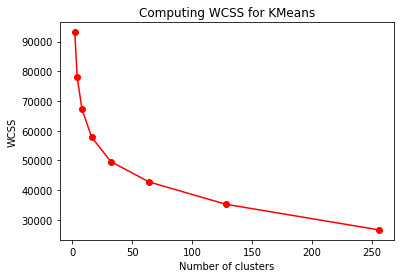

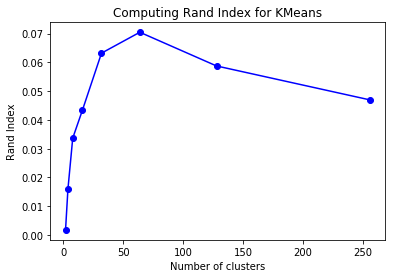

In [13]:
wcss = []
rand_score = []
k_values = [2,4,8,16,32,64,128,256]
for i in k_values:
    #init_i = np.random.randint((-1,1), size=(i,116))
    kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=200) 
    cluster_labels = kmeans.fit_predict(X)
    rand_score.append(adjusted_rand_score(Y, cluster_labels))
    #cluster_center = kmeans.cluster_centers_
    wcss.append(kmeans.inertia_ )

plt.plot( k_values, wcss , 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.savefig('myfig')
plt.show()


plt.plot( k_values, rand_score , 'bo-', label="Rand")
plt.title("Computing Rand Index for KMeans")
plt.xlabel("Number of clusters")
plt.ylabel("Rand Index")
plt.savefig('myfig1')
plt.show()


In [14]:
rand_score

[0.0017834726521723668,
 0.015997443185970926,
 0.033660992396855806,
 0.04326894480690437,
 0.06318677676166562,
 0.07044783610169138,
 0.05873802678320237,
 0.046950221607796334]

In [15]:
wcss

[93160.32362289084,
 77936.05120068476,
 67304.37371644287,
 57879.0588099843,
 49632.57435151055,
 42770.254818778354,
 35264.84191416455,
 26620.497391040913]

In [10]:
from sklearn.decomposition import PCA

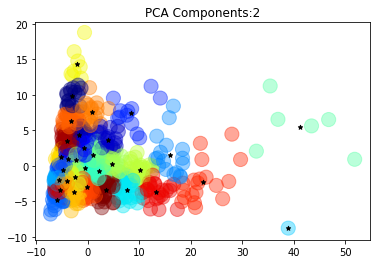

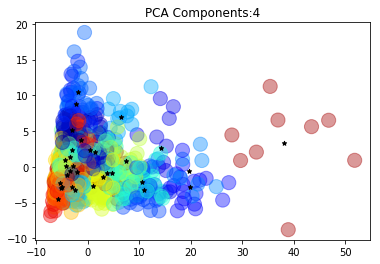

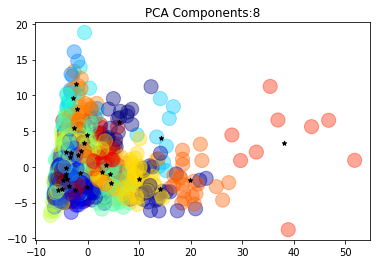

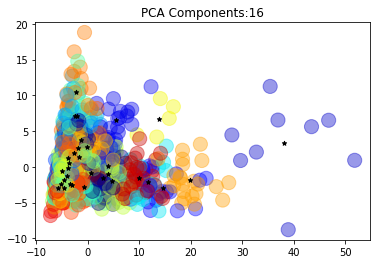

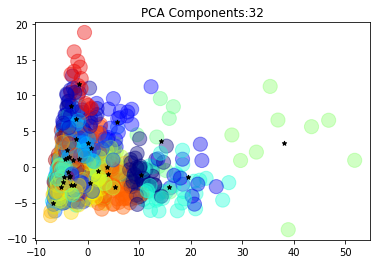

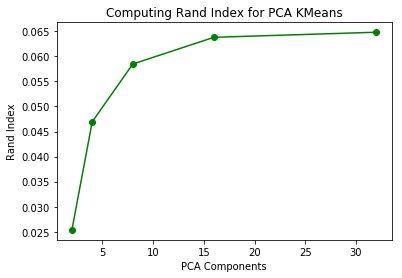

In [16]:
rand_score_pca = []
kmeans = KMeans(n_clusters=32, init="random", n_init=10, max_iter=300) 
for i in [2,4,8,16,32]:
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(X)
    cluster_labels_pca = kmeans.fit_predict(pca_result)
    cluster_center = kmeans.cluster_centers_
    rand_score_pca.append(adjusted_rand_score(Y, cluster_labels_pca))
    plt.scatter(pca_result[:,0],pca_result[:,1], c=cluster_labels_pca, s=200, cmap='jet', zorder=2, alpha=0.4)
    plt.scatter(cluster_center[:,0], cluster_center[:, 1], s=20, cmap='jet', zorder=2, c='black', marker="*")
    plt.title("PCA Components:"+ str(i))
    plt.savefig('myfig2')
    plt.show()
   

plt.plot( [2,4,8,16,32], rand_score_pca , 'go-', label="rand_score_pca")
plt.title("Computing Rand Index for PCA KMeans")
plt.xlabel("PCA Components")
plt.ylabel("Rand Index")
plt.show()



In [17]:
rand_score_pca

[0.025366705036691455,
 0.04693378857643953,
 0.05846776239884609,
 0.06379978800147185,
 0.06480981390420985]